<a href="https://colab.research.google.com/github/MANASVI005/heart_disease_prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount(  '/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

'240310660104_ApplicationForm (1).pdf'
 240310660104_ApplicationForm.pdf
'2. Synthesis exercise 2, 3, 4 and 5.pdf'
 AntiraggingAffidavitForm.pdf
'Applications of LASER.gslides'
 archive
'archive (1).zip'
'can you please make a pdf of the answers of all q....gdoc'
 CENTROIDS-2024.pdf
'CHAPTERWISE TOP 109 PYQs JEE Mains 2022 + answer key.pdf'
 Classroom
'CO2 Laser.gslides'
'Colab Notebooks'
'college allotment and fees receipt .pdf'
'Coursera APL4Q0QSRUQ1_copy.pdf'
 cv1.gdoc
 CV.gdoc
'Differential Calculus (1).gdoc'
'Differential Calculus.gdoc'
'Doc Scanner'
'Doc Scanner Upload'
'EM UNIT 1 -PART1-2024.pdf'
 FCA24_copy.pdf
 FCA24.pdf
'FE 2024_NEW SYLLABY (1).gdoc'
 google.pdf
 IMG_20210630_175152.jpg
'Important Documents.pdf'
'Kiran academy .pdf'
'Kiran academy..pdf'
'*Kiran Vedic academy*.pdf'
'Lect 1.gslides'
'Lect 2.gslides'
'MAHADBT appln (1).pdf'
'more big answers.gdoc'
'PDF Gallery_20230902_170500 (1).pdf'
'PDF Gallery_20230902_170500.pdf'
'Photo from Manasvi'
'rahivashi form.jpg'
 R

In [3]:
# Install required packages
!pip install tensorflow opencv-python pillow pandas numpy matplotlib scikit-learn grad-cam

# If using PyTorch instead:
# !pip install torch torchvision pytorch-grad-cam

# For deployment
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44283 sha256=01a58b198de2f7a30bf977063e608ed83387cdd34c1fabd53baa0e800b93b914
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# Image processing
from skimage.feature import hog, local_binary_pattern
from skimage import exposure
import joblib
from tqdm.notebook import tqdm

# Set random seed
np.random.seed(42)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [5]:
import os
import zipfile

# Define paths - ADJUST THIS to where your zip file is located
ZIP_PATH = '/content/drive/MyDrive/archive (1).zip'  # Change this path if needed
EXTRACT_PATH = '/content/mimic_cxr_data'

# Create extraction directory
os.makedirs(EXTRACT_PATH, exist_ok=True)

# Extract the zip file
print("📦 Extracting archive...")
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print(f"✅ Extraction complete!")
print(f"\nContents of {EXTRACT_PATH}:")
print(os.listdir(EXTRACT_PATH))

📦 Extracting archive...
✅ Extraction complete!

Contents of /content/mimic_cxr_data:
['train', 'mimic-cxr.csv', 'test', 'valid']


In [6]:
# Define dataset paths
CSV_PATH = os.path.join(EXTRACT_PATH, 'mimic-cxr.csv')
TRAIN_DIR = os.path.join(EXTRACT_PATH, 'train')
TEST_DIR = os.path.join(EXTRACT_PATH, 'test')
VALID_DIR = os.path.join(EXTRACT_PATH, 'valid')

# Verify paths exist
print("Checking dataset structure:")
print(f"CSV exists: {os.path.exists(CSV_PATH)}")
print(f"Train folder exists: {os.path.exists(TRAIN_DIR)}")
print(f"Test folder exists: {os.path.exists(TEST_DIR)}")
print(f"Valid folder exists: {os.path.exists(VALID_DIR)}")

if os.path.exists(TRAIN_DIR):
    print(f"\nTrain folder has {len(os.listdir(TRAIN_DIR))} images")
if os.path.exists(TEST_DIR):
    print(f"Test folder has {len(os.listdir(TEST_DIR))} images")
if os.path.exists(VALID_DIR):
    print(f"Valid folder has {len(os.listdir(VALID_DIR))} images")

Checking dataset structure:
CSV exists: True
Train folder exists: True
Test folder exists: True
Valid folder exists: True

Train folder has 83837 images
Test folder has 1455 images
Valid folder has 711 images


In [7]:
# Load CSV
df = pd.read_csv(CSV_PATH)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(10))

print(f"\nColumn names:")
print(df.columns.tolist())

print(f"\nDataset info:")
print(df.info())

Dataset shape: (86003, 14)

First few rows:
        filename  split                        label  Atelectasis  \
0  s50000014.jpg  train                       Normal          0.0   
1  s50000052.jpg  train                       Normal          0.0   
2  s50000125.jpg  train                       Normal          0.0   
3  s50000173.jpg  train                       Normal          0.0   
4  s50000198.jpg  train                Consolidation          0.0   
5  s50001042.jpg  train                       Normal          0.0   
6  s50001080.jpg  train                       Normal          0.0   
7  s50001166.jpg  train  Pleural Effusion, Pneumonia          0.0   
8  s50001349.jpg  train                 Lung Opacity          0.0   
9  s50001417.jpg  train                       Normal          0.0   

   Cardiomegaly  Consolidation  Edema  Enlarged Cardiomediastinum  \
0           0.0            0.0    0.0                         0.0   
1           0.0            0.0    0.0                     

In [8]:
# Define disease columns
DISEASE_COLUMNS = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
                   'Enlarged Cardiomediastinum', 'Lung Lesion', 'Lung Opacity',
                   'Pleural Effusion', 'Pneumonia', 'Pneumothorax']

# Check for Normal column
if 'Normal' in df.columns:
    print("Normal column found in dataset")
else:
    print("Creating Normal column...")
    # A case is Normal if all disease columns are 0
    df['Normal'] = (df[DISEASE_COLUMNS].sum(axis=1) == 0).astype(int)

# Distribution of splits
print("\nDataset split distribution:")
print(df['split'].value_counts())

# Disease distribution
print("\nDisease distribution:")
disease_counts = df[DISEASE_COLUMNS + ['Normal']].sum().sort_values(ascending=False)
print(disease_counts)

Normal column found in dataset

Dataset split distribution:
split
train    83837
test      1455
valid      711
Name: count, dtype: int64

Disease distribution:
Normal                        31827.0
Pleural Effusion              21284.0
Lung Opacity                  20651.0
Atelectasis                   18492.0
Cardiomegaly                  15816.0
Edema                         10778.0
Pneumonia                      6291.0
Consolidation                  4258.0
Pneumothorax                   3748.0
Enlarged Cardiomediastinum     2751.0
Lung Lesion                    2497.0
dtype: float64


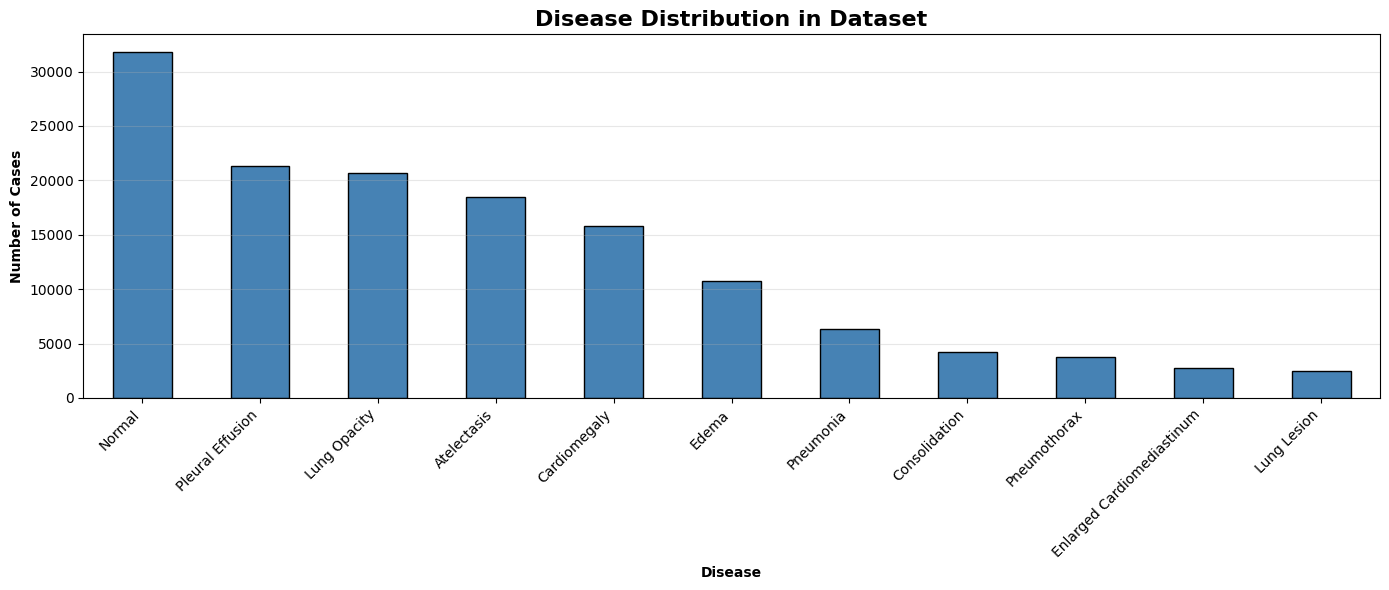


Disease percentage:
Normal: 37.01%
Pleural Effusion: 24.75%
Lung Opacity: 24.01%
Atelectasis: 21.5%
Cardiomegaly: 18.39%
Edema: 12.53%
Pneumonia: 7.31%
Consolidation: 4.95%
Pneumothorax: 4.36%
Enlarged Cardiomediastinum: 3.2%
Lung Lesion: 2.9%


In [9]:
# Visualize disease distribution
plt.figure(figsize=(14, 6))
disease_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Disease Distribution in Dataset', fontweight='bold', fontsize=16)
plt.xlabel('Disease', fontweight='bold')
plt.ylabel('Number of Cases', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show percentage distribution
print("\nDisease percentage:")
disease_pct = (disease_counts / len(df) * 100).round(2)
for disease, pct in disease_pct.items():
    print(f"{disease}: {pct}%")

In [10]:
# Build full image paths
def get_image_path(row):
    """Get full path to image based on split"""
    split_folder = row['split']
    filename = row['filename']

    if split_folder == 'train':
        return os.path.join(TRAIN_DIR, filename)
    elif split_folder == 'test':
        return os.path.join(TEST_DIR, filename)
    elif split_folder == 'valid':
        return os.path.join(VALID_DIR, filename)
    else:
        return None

df['image_path'] = df.apply(get_image_path, axis=1)

# Verify images exist
df['image_exists'] = df['image_path'].apply(lambda x: os.path.exists(x) if x else False)

print(f"Images found: {df['image_exists'].sum()} / {len(df)}")
print(f"Missing images: {(~df['image_exists']).sum()}")

# Remove rows with missing images
df = df[df['image_exists']].copy()
df = df.drop('image_exists', axis=1)

print(f"\n✅ Final dataset size: {len(df)} samples with valid images")

Images found: 86003 / 86003
Missing images: 0

✅ Final dataset size: 86003 samples with valid images


In [3]:
# For faster training, let's use a subset of data
# You can increase this for better accuracy
SAMPLE_SIZE_PER_SPLIT = 5000  # Adjust this based on your needs

print(f"Sampling {SAMPLE_SIZE_PER_SPLIT} images per split for faster training...")

train_df = df[df['split'] == 'train'].sample(min(SAMPLE_SIZE_PER_SPLIT, len(df[df['split'] == 'train'])), random_state=42)
valid_df = df[df['split'] == 'valid'].sample(min(SAMPLE_SIZE_PER_SPLIT, len(df[df['split'] == 'valid'])), random_state=42)
test_df = df[df['split'] == 'test'].sample(min(SAMPLE_SIZE_PER_SPLIT, len(df[df['split'] == 'test'])), random_state=42)

print(f"\nFinal splits:")
print(f"Training: {len(train_df)} samples")
print(f"Validation: {len(valid_df)} samples")
print(f"Test: {len(test_df)} samples")

Sampling 5000 images per split for faster training...


NameError: name 'df' is not defined

In [1]:
def extract_features_batch(paths, size=(64,64)):
    feats = []
    for p in paths:
        try:
            img = cv2.imread(p, 0)
            if img is None:
                feats.append(None)
                continue
            img = cv2.resize(img, size) / 255.0

            # Features
            pixels = img.flatten()[::4]
            stats = [np.mean(img), np.std(img), np.min(img), np.max(img)]
            hist, _ = np.histogram(img, 16, (0,1))
            hist = hist/hist.sum()
            sx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
            sy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
            edge = np.sqrt(sx**2 + sy**2)
            edge_stats = [np.mean(edge), np.std(edge)]

            feats.append(np.concatenate([pixels, stats, edge_stats, hist]))
        except:
            feats.append(None)
    return feats

def process_batches(df, bs=100):
    all_f, all_l = [], []
    for i in tqdm(range(0, len(df), bs)):
        batch = df.iloc[i:i+bs]
        feats = extract_features_batch(batch['image_path'].tolist(), IMG_SIZE)
        for idx, f in enumerate(feats):
            if f is not None:
                all_f.append(f)
                all_l.append(batch.iloc[idx][DISEASE_COLUMNS].values)
        gc.collect()
    return np.array(all_f), np.array(all_l)

print("✅ Functions defined!")


✅ Functions defined!


In [2]:
print("Training...")
X_train, y_train = process_batches(train_df, BATCH_SIZE)
print(f"Train: {X_train.shape}")
gc.collect()


Training...


NameError: name 'train_df' is not defined

Sample images from dataset:



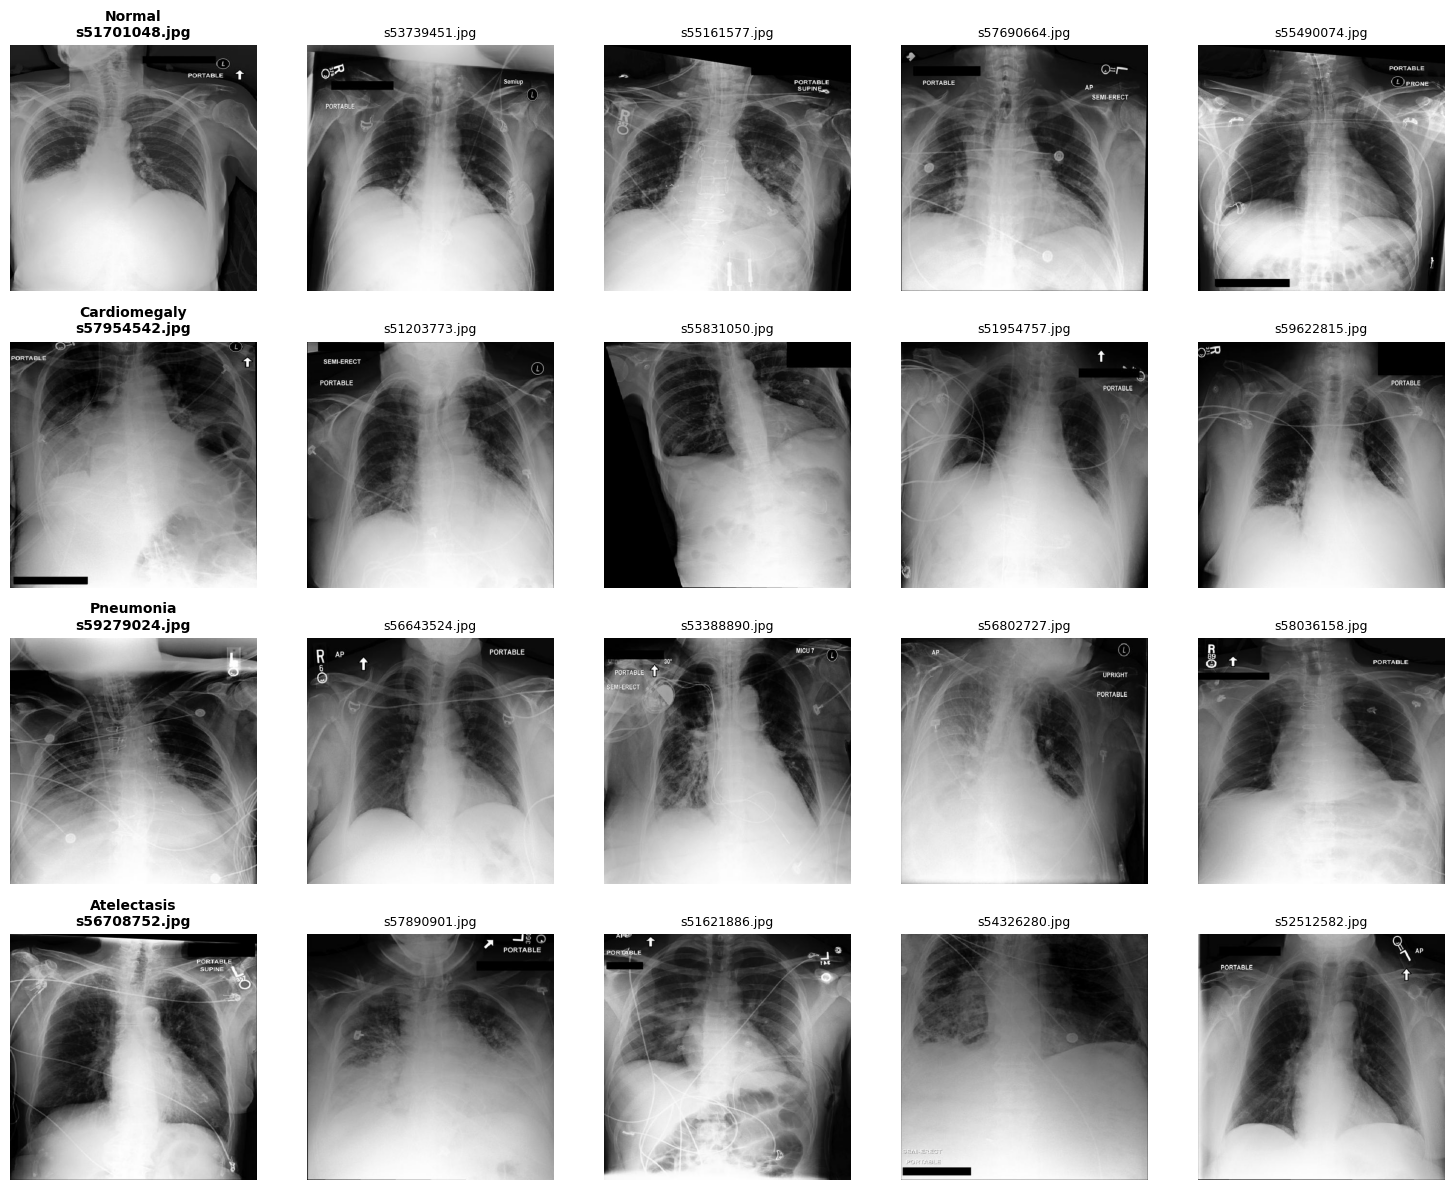

In [16]:
# Display sample images from each category
def show_sample_images(df, diseases, n_samples=3):
    """
    Display sample images for each disease
    """
    fig, axes = plt.subplots(len(diseases), n_samples, figsize=(15, len(diseases) * 3))

    for i, disease in enumerate(diseases):
        # Get samples for this disease
        disease_samples = df[df[disease] == 1].sample(min(n_samples, sum(df[disease] == 1)))

        for j, (idx, row) in enumerate(disease_samples.iterrows()):
            if len(diseases) == 1:
                ax = axes[j]
            else:
                ax = axes[i, j]

            try:
                img = Image.open(row['image_path'])
                ax.imshow(img, cmap='gray')
                ax.axis('off')

                if j == 0:
                    ax.set_title(f"{disease}\n{row['filename']}",
                               fontweight='bold', fontsize=10)
                else:
                    ax.set_title(row['filename'], fontsize=9)
            except Exception as e:
                ax.text(0.5, 0.5, 'Image not found',
                       ha='center', va='center')
                ax.axis('off')

    plt.tight_layout()
    plt.show()

# Show samples for key diseases
sample_diseases = ['Normal', 'Cardiomegaly', 'Pneumonia', 'Atelectasis']
print("Sample images from dataset:\n")
show_sample_images(df, sample_diseases, n_samples=5)

In [17]:
# Split data based on the 'split' column
train_df = df[df['split'] == 'train'].reset_index(drop=True)
valid_df = df[df['split'] == 'valid'].reset_index(drop=True)
test_df = df[df['split'] == 'test'].reset_index(drop=True)

print("Dataset splits:")
print(f"Training: {len(train_df)} samples")
print(f"Validation: {len(valid_df)} samples")
print(f"Test: {len(test_df)} samples")

# Set image parameters
IMG_SIZE = 224  # EfficientNetB3 default input size
BATCH_SIZE = 32
NUM_CLASSES = len(DISEASE_COLUMNS)

Dataset splits:
Training: 83837 samples
Validation: 711 samples
Test: 1455 samples


In [18]:
# Create data generators
# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0
)

# Validation and test data - only rescaling
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators from dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col=DISEASE_COLUMNS,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='raw',  # Multi-label classification
    shuffle=True,
    seed=42
)

valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image_path',
    y_col=DISEASE_COLUMNS,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col=DISEASE_COLUMNS,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False
)

print("✅ Data generators created successfully!")

Found 83837 validated image filenames.
Found 711 validated image filenames.
Found 1455 validated image filenames.
✅ Data generators created successfully!


In [23]:
def create_model(num_classes=NUM_CLASSES, img_size=IMG_SIZE):
    """
    Create EfficientNetB3 model for multi-label classification
    """
    # Load pre-trained EfficientNetB3
    base_model = EfficientNetB3(
        weights='imagenet',
        include_top=False,
        input_shape=(img_size, img_size, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    inputs = keras.Input(shape=(img_size, img_size, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Output layer - sigmoid for multi-label
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = keras.Model(inputs, outputs)

    return model, base_model

# Create model
model, base_model = create_model()

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Multi-label classification
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc', multi_label=True)
    ]
)

print("Model architecture:")
model.summary()

print(f"\n✅ Model created with {model.count_params():,} parameters")
print(f"Trainable parameters: {sum([np.prod(p.shape) for p in model.trainable_weights]):,}")

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Model architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1536)           │         6,144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,583,801 (44.19 MB)

 Trainable params: 796,170 (3.04 MB)

 Non-trainable params: 10,787,631 (41.15 MB)


✅ Model created with 11,583,801 parameters
Trainable parameters: 796,170


In [24]:
# Define callbacks
checkpoint = ModelCheckpoint(
    'best_model_phase1.h5',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks_phase1 = [checkpoint, early_stop, reduce_lr]

In [42]:
# Train Phase 1
print("🚀 Starting Phase 1 Training (frozen base model)...\n")

EPOCHS_PHASE1 = 4

history_phase1 = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks_phase1,
    verbose=1
)

print("\n✅ Phase 1 training complete!")

🚀 Starting Phase 1 Training (frozen base model)...

Epoch 1/4
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.0706 - auc: 0.5017 - loss: 0.3414 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_auc did not improve from 0.50735
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 1181s 451ms/step - accuracy: 0.0706 - auc: 0.5017 - loss: 0.3414 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0366 - val_auc: 0.4826 - val_loss: 0.3316 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 2/4
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.0683 - auc: 0.5016 - loss: 0.3397 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_auc did not improve from 0.50735
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 1175s 449ms/step - accuracy: 0.0683 - auc: 0.5016 - loss: 0.3397 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0408 - val_auc: 0.4825 - val_loss: 0.3316 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e

KeyboardInterrupt: 

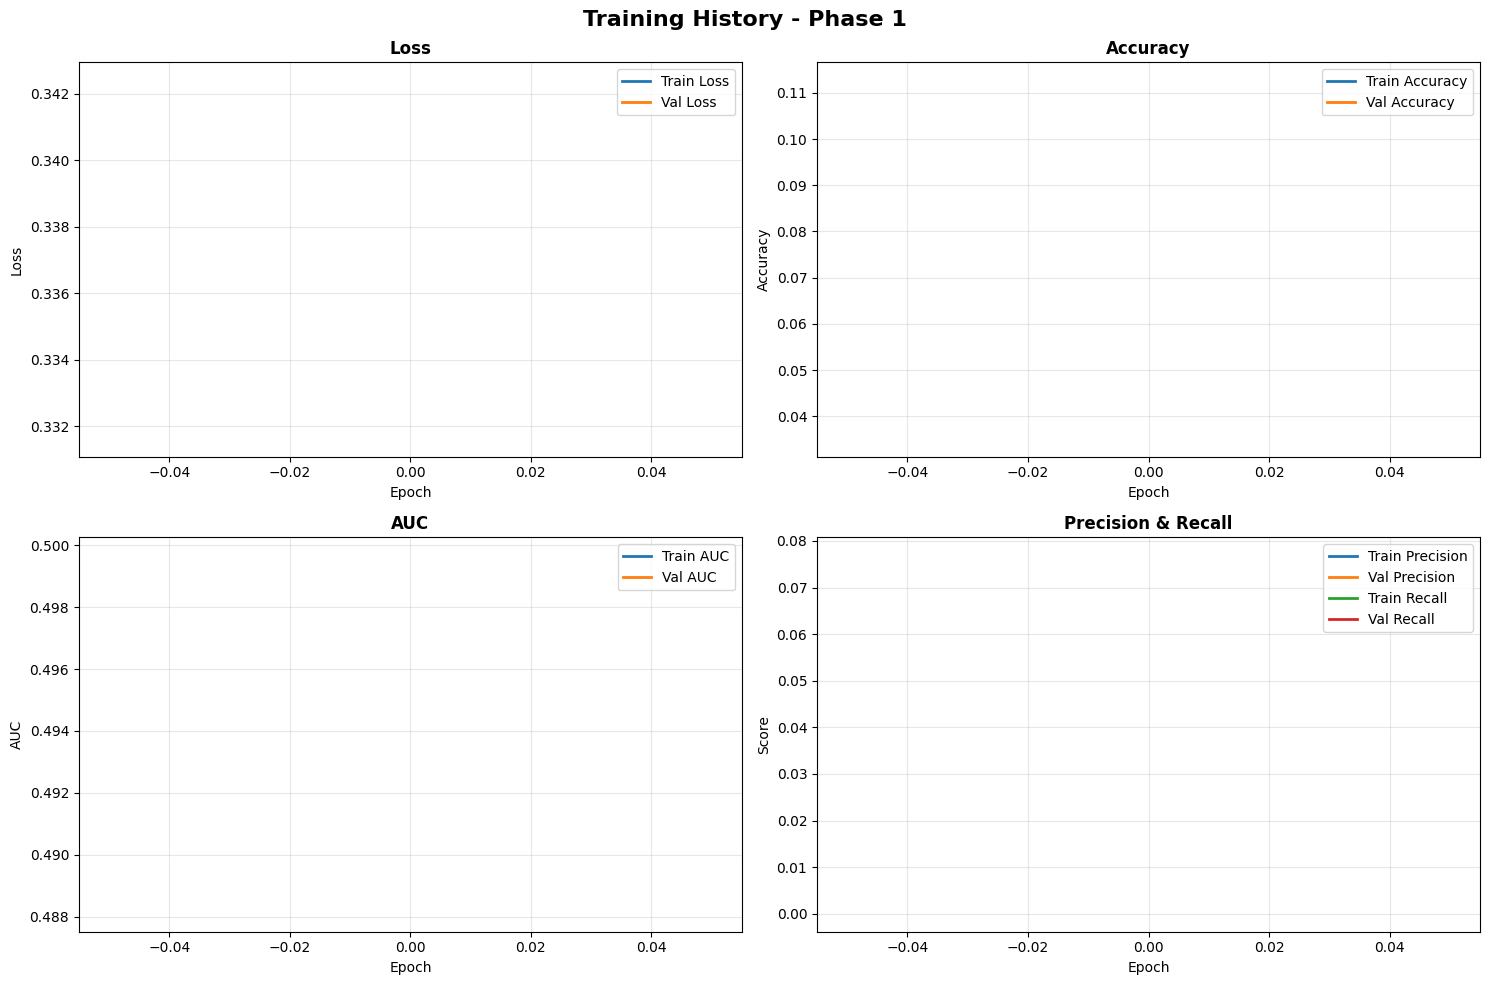

In [28]:
# Plot Phase 1 training history
def plot_training_history(history, phase_name=""):
    """
    Plot training and validation metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Training History - {phase_name}', fontweight='bold', fontsize=16)

    # Loss
    axes[0, 0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0, 0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0, 0].set_title('Loss', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0, 1].set_title('Accuracy', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # AUC
    axes[1, 0].plot(history.history['auc'], label='Train AUC', linewidth=2)
    axes[1, 0].plot(history.history['val_auc'], label='Val AUC', linewidth=2)
    axes[1, 0].set_title('AUC', fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('AUC')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Precision & Recall
    axes[1, 1].plot(history.history['precision'], label='Train Precision', linewidth=2)
    axes[1, 1].plot(history.history['val_precision'], label='Val Precision', linewidth=2)
    axes[1, 1].plot(history.history['recall'], label='Train Recall', linewidth=2)
    axes[1, 1].plot(history.history['val_recall'], label='Val Recall', linewidth=2)
    axes[1, 1].set_title('Precision & Recall', fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history_phase1, "Phase 1")

In [29]:
# Unfreeze base model
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100  # Unfreeze the last 100+ layers

# Freeze all layers before fine_tune_at
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Much lower LR for fine-tuning
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc', multi_label=True)
    ]
)

print(f"✅ Model unfrozen for fine-tuning")
print(f"Trainable parameters: {sum([np.prod(p.shape) for p in model.trainable_weights]):,}")

✅ Model unfrozen for fine-tuning
Trainable parameters: 11,372,112


In [30]:
# Update callbacks for Phase 2
checkpoint_phase2 = ModelCheckpoint(
    'best_model_phase2.h5',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stop_phase2 = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

callbacks_phase2 = [checkpoint_phase2, early_stop_phase2, reduce_lr]

In [31]:
# Train Phase 2
print("🚀 Starting Phase 2 Training (fine-tuning)...\n")

EPOCHS_PHASE2 = 4

history_phase2 = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks_phase2,
    verbose=1
)

print("\n✅ Phase 2 training complete!")

🚀 Starting Phase 2 Training (fine-tuning)...

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.1246 - auc: 0.4990 - loss: 0.3419 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_auc improved from -inf to 0.50836, saving model to best_model_phase2.h5


2620/2620 ━━━━━━━━━━━━━━━━━━━━ 1375s 485ms/step - accuracy: 0.1246 - auc: 0.4990 - loss: 0.3419 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0309 - val_auc: 0.5084 - val_loss: 0.3316 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 1.

✅ Phase 2 training complete!


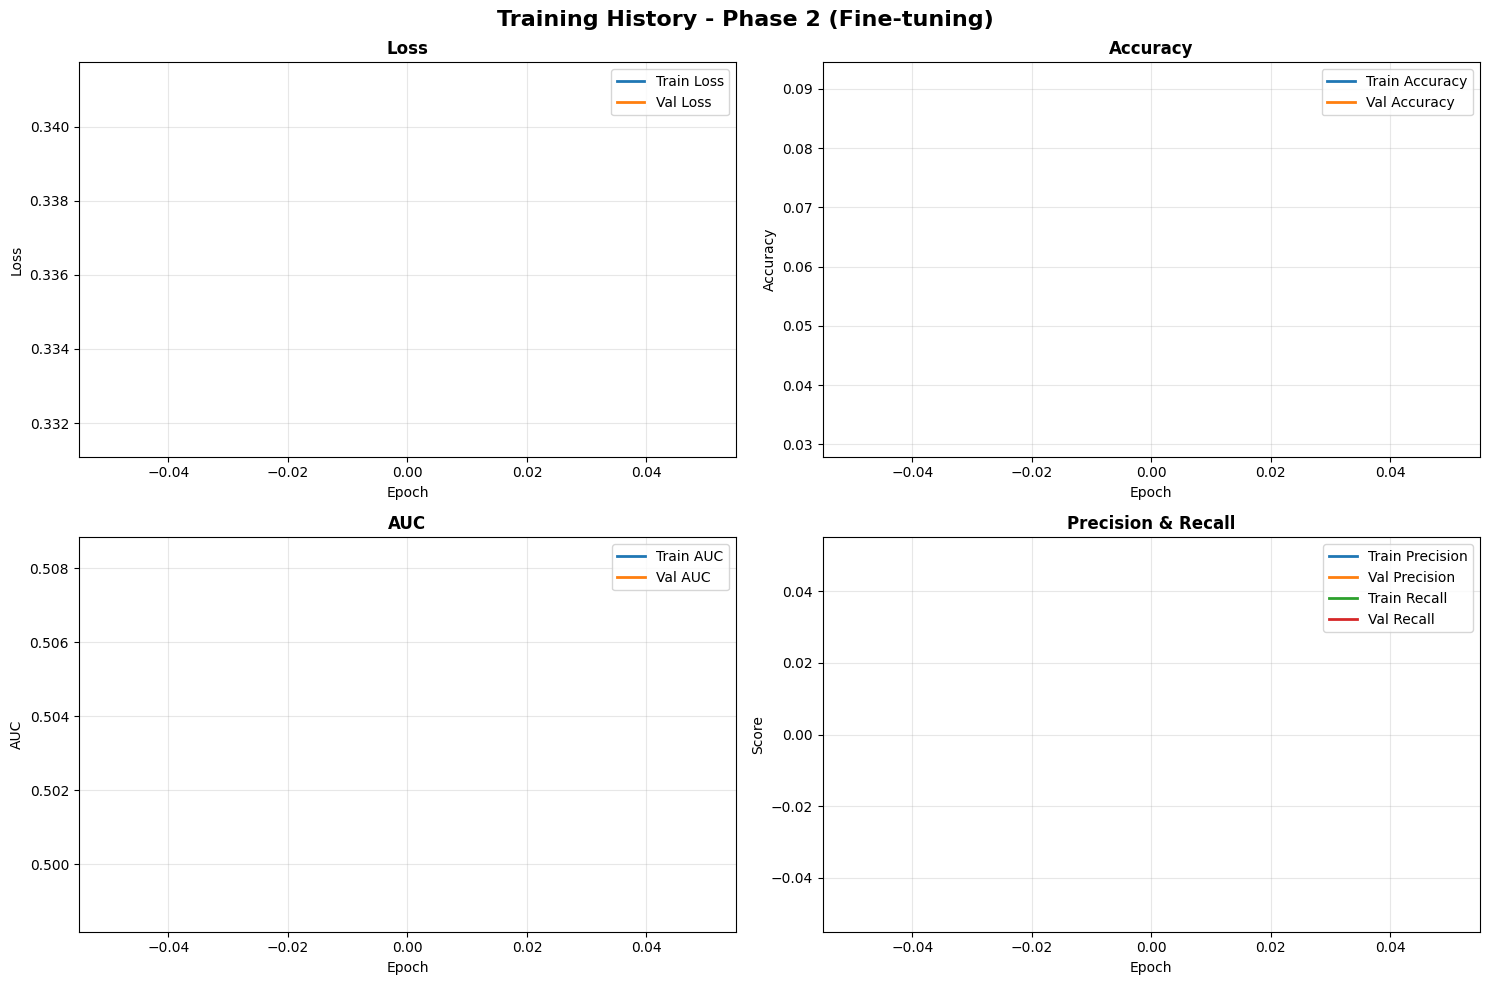

In [32]:
# Plot Phase 2 training history
plot_training_history(history_phase2, "Phase 2 (Fine-tuning)")

In [33]:
# Evaluate on test set
print("📊 Evaluating model on test set...\n")

test_results = model.evaluate(test_generator, verbose=1)

print("\n" + "="*50)
print("TEST SET RESULTS")
print("="*50)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")
print(f"Test AUC: {test_results[4]:.4f}")
print("="*50)

📊 Evaluating model on test set...

46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.0503 - auc: 0.5233 - loss: 0.3461 - precision: 0.0000e+00 - recall: 0.0000e+00

TEST SET RESULTS
Test Loss: 0.3395
Test Accuracy: 0.0454
Test Precision: 0.0000
Test Recall: 0.0000
Test AUC: 0.5150


In [34]:
# Get predictions
print("Getting predictions on test set...")
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = test_df[DISEASE_COLUMNS].values

print(f"\nPrediction shape: {y_pred_probs.shape}")
print(f"True labels shape: {y_true.shape}")

Getting predictions on test set...
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 298ms/step

Prediction shape: (1455, 10)
True labels shape: (1455, 10)


In [35]:
# Per-class metrics
print("\n" + "="*70)
print("PER-DISEASE PERFORMANCE")
print("="*70)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results_per_disease = []

for i, disease in enumerate(DISEASE_COLUMNS):
    accuracy = accuracy_score(y_true[:, i], y_pred[:, i])
    precision = precision_score(y_true[:, i], y_pred[:, i], zero_division=0)
    recall = recall_score(y_true[:, i], y_pred[:, i], zero_division=0)
    f1 = f1_score(y_true[:, i], y_pred[:, i], zero_division=0)

    try:
        roc_auc = roc_auc_score(y_true[:, i], y_pred_probs[:, i])
    except:
        roc_auc = 0.0

    results_per_disease.append({
        'Disease': disease,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': roc_auc
    })

    print(f"\n{disease}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  AUC:       {roc_auc:.4f}")

# Create DataFrame for better visualization
results_df = pd.DataFrame(results_per_disease)
print("\n" + "="*70)
print(results_df.to_string(index=False))
print("="*70)


PER-DISEASE PERFORMANCE

Atelectasis:
  Accuracy:  0.8172
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5111

Cardiomegaly:
  Accuracy:  0.8426
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5111

Consolidation:
  Accuracy:  0.9416
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5085

Edema:
  Accuracy:  0.8729
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5075

Enlarged Cardiomediastinum:
  Accuracy:  0.9711
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5579

Lung Lesion:
  Accuracy:  0.9450
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.4558

Lung Opacity:
  Accuracy:  0.7663
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5120

Pleural Effusion:
  Accuracy:  0.7711
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  AUC:       0.5127

Pneumonia:
  Accuracy:  0.9299
  Precision: 

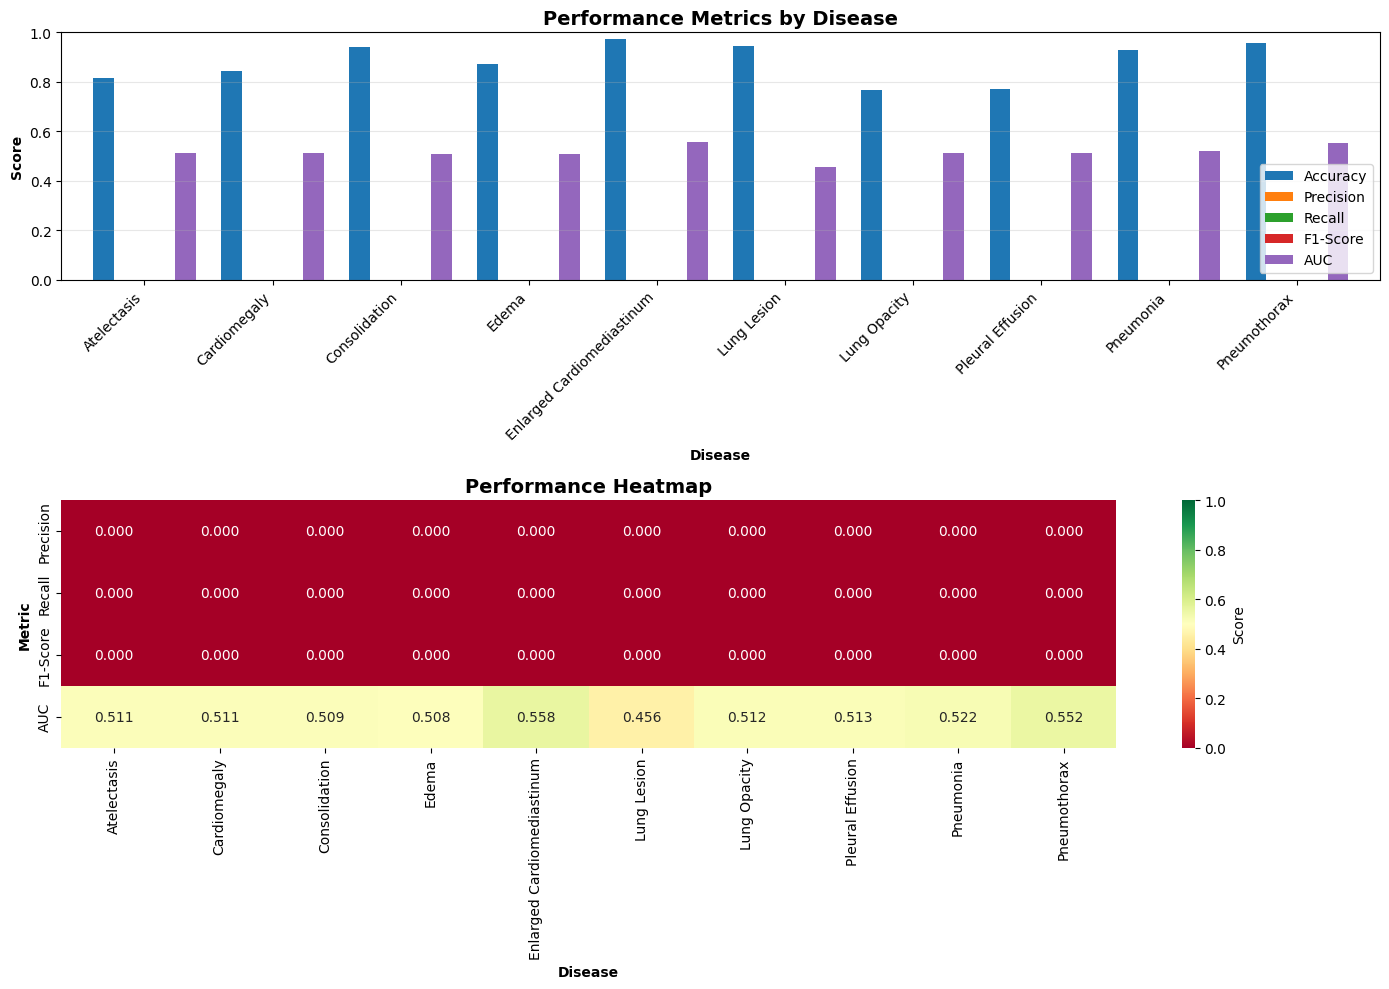

In [36]:
# Visualize per-disease performance
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Bar chart of all metrics
results_df.set_index('Disease')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']].plot(
    kind='bar', ax=axes[0], width=0.8
)
axes[0].set_title('Performance Metrics by Disease', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Disease', fontweight='bold')
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].set_xticklabels(results_df['Disease'], rotation=45, ha='right')
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Plot 2: Heatmap
metrics_heatmap = results_df.set_index('Disease')[['Precision', 'Recall', 'F1-Score', 'AUC']].T
sns.heatmap(metrics_heatmap, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0, vmax=1, ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Performance Heatmap', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Disease', fontweight='bold')
axes[1].set_ylabel('Metric', fontweight='bold')

plt.tight_layout()
plt.show()

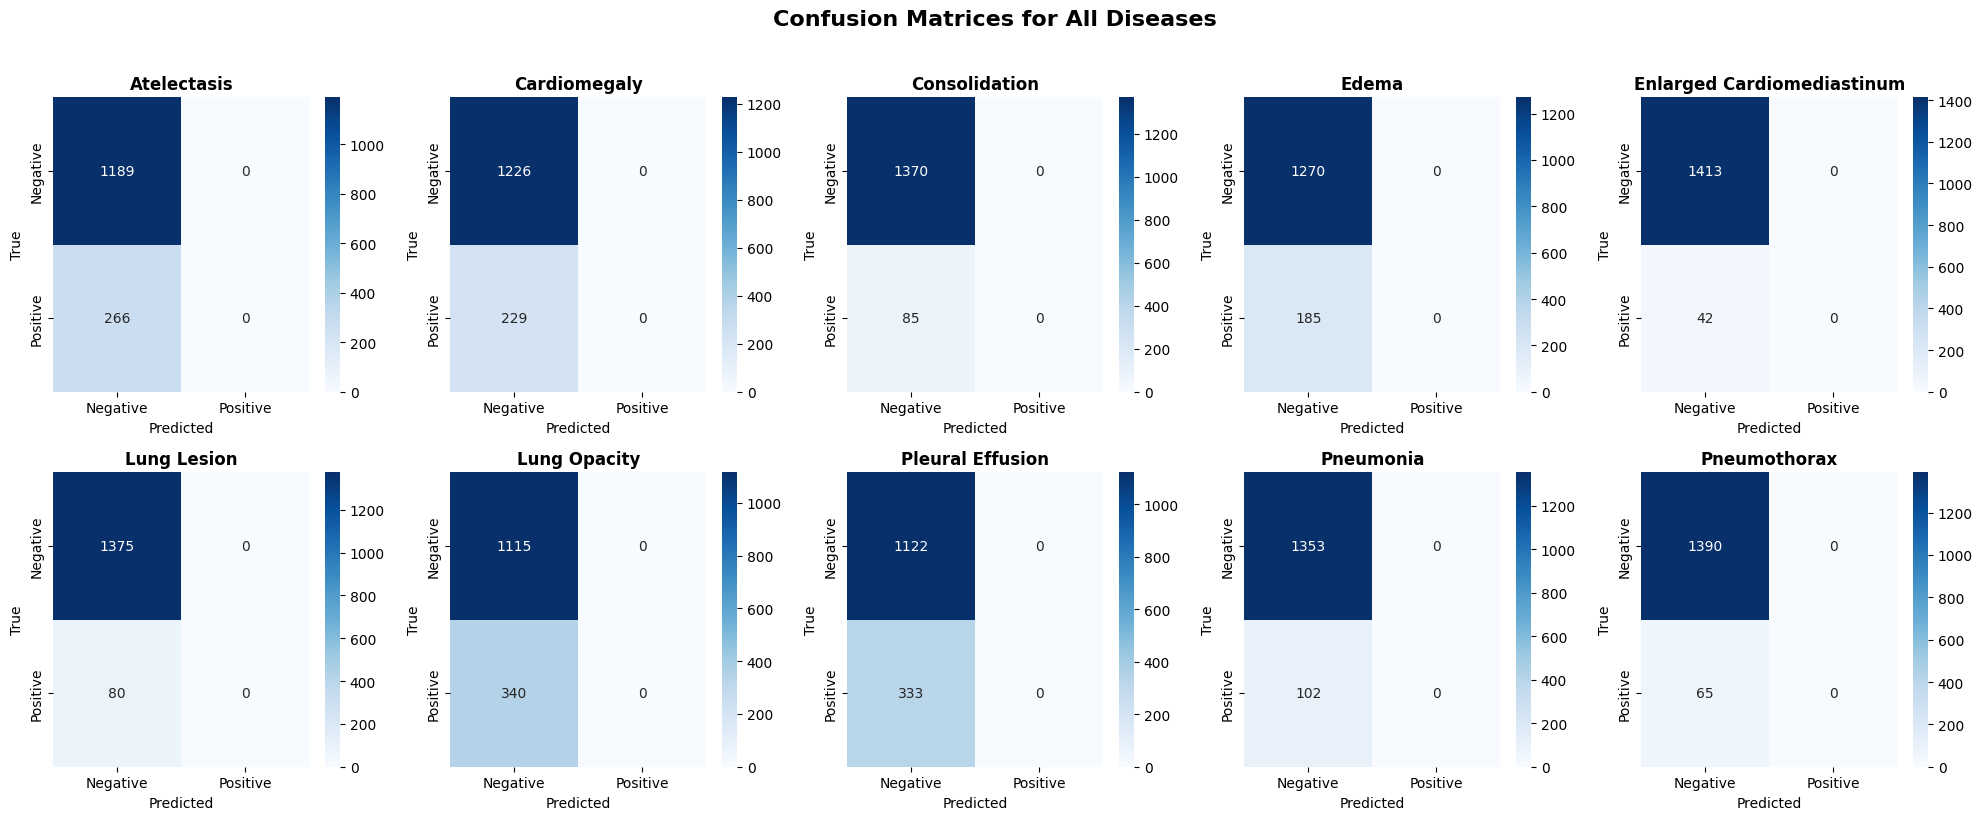

In [37]:
# Confusion matrices for each disease
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, disease in enumerate(DISEASE_COLUMNS):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[i].set_title(disease, fontweight='bold')
    axes[i].set_ylabel('True')
    axes[i].set_xlabel('Predicted')

plt.suptitle('Confusion Matrices for All Diseases', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

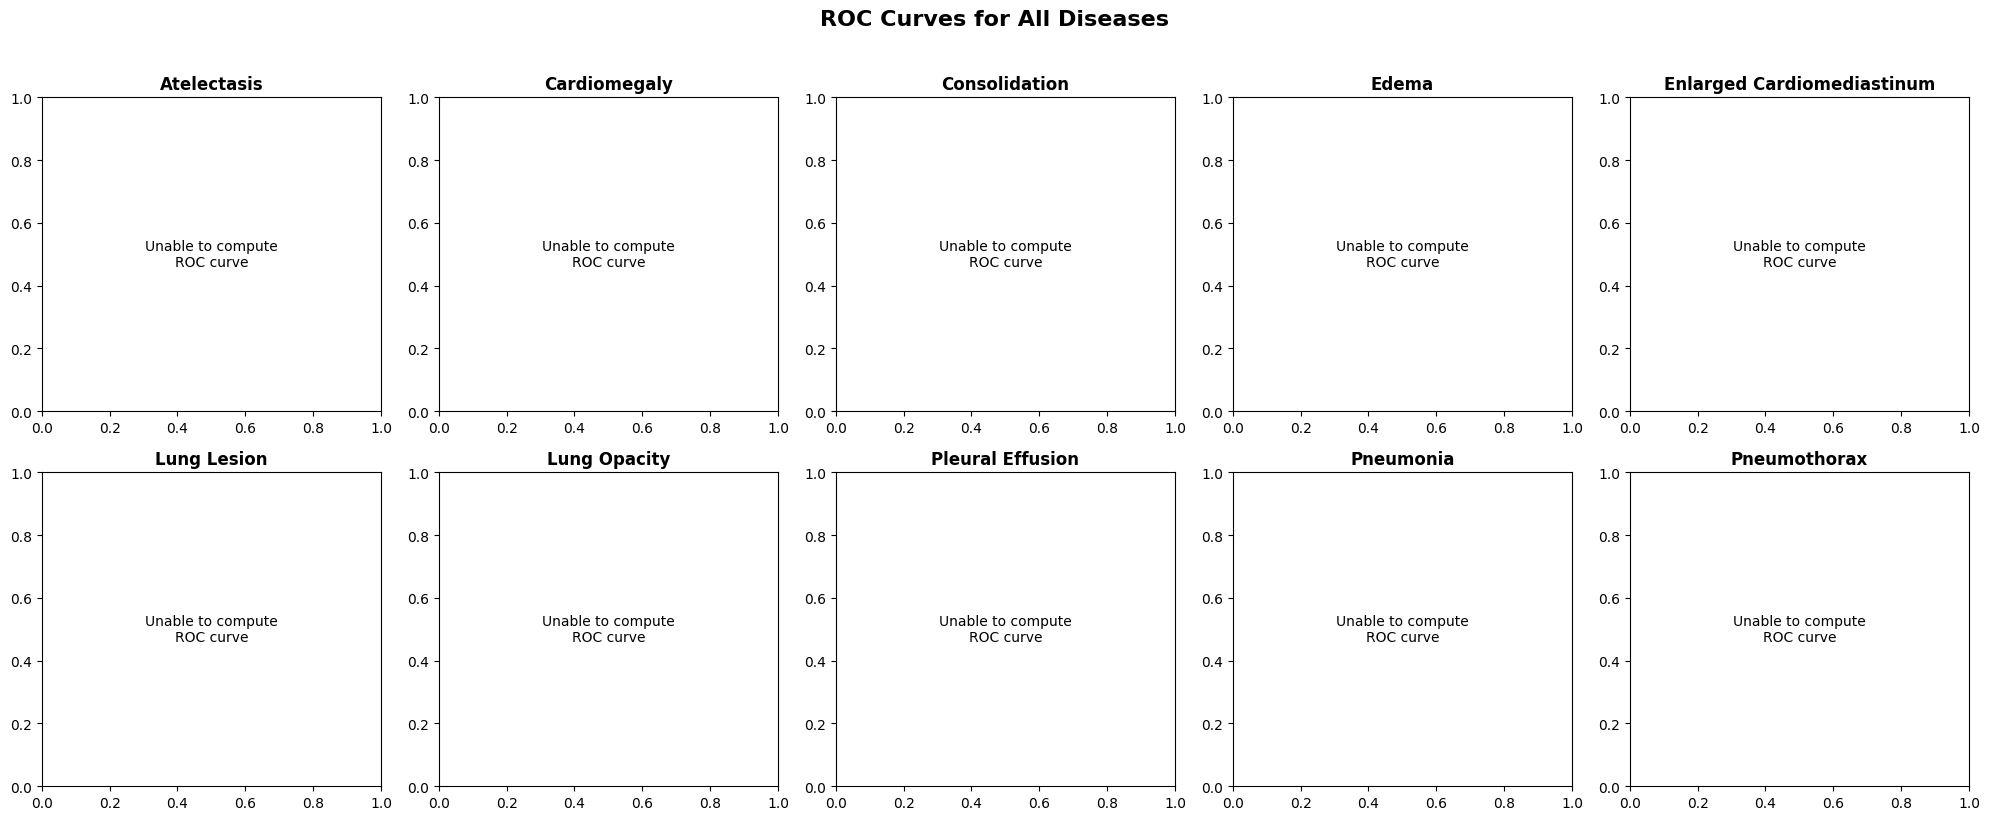

In [38]:
# ROC curves for all diseases
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, disease in enumerate(DISEASE_COLUMNS):
    try:
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)

        axes[i].plot(fpr, tpr, color='darkorange', lw=2,
                    label=f'AUC = {roc_auc:.3f}')
        axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(disease, fontweight='bold')
        axes[i].legend(loc="lower right")
        axes[i].grid(True, alpha=0.3)
    except Exception as e:
        axes[i].text(0.5, 0.5, f'Unable to compute\nROC curve',
                    ha='center', va='center')
        axes[i].set_title(disease, fontweight='bold')

plt.suptitle('ROC Curves for All Diseases', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [39]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Generate Grad-CAM heatmap for a specific prediction
    """
    # Create a model that outputs the last conv layer and predictions
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradient
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Get gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by importance
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(image_path, model, disease_columns, last_conv_layer_name='top_conv'):
    """
    Display original image with Grad-CAM overlays for predicted diseases
    """
    # Load and preprocess image
    img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make prediction
    predictions = model.predict(img_array, verbose=0)[0]

    # Get top 3 predicted diseases
    top_indices = np.argsort(predictions)[-3:][::-1]

    # Display
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Original image
    axes[0].imshow(img)
    axes[0].set_title('Original X-ray', fontweight='bold', fontsize=12)
    axes[0].axis('off')

    # Grad-CAM for top 3 predictions
    for i, idx in enumerate(top_indices):
        disease = disease_columns[idx]
        prob = predictions[idx]

        # Generate heatmap
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=idx)

        # Resize and colorize
        heatmap = cv2.resize(heatmap, (IMG_SIZE, IMG_SIZE))
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Superimpose
        original_img = np.array(img)
        superimposed = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

        axes[i+1].imshow(superimposed)
        axes[i+1].set_title(f'{disease}\nProb: {prob:.3f}', fontweight='bold', fontsize=11)
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

print("✅ Grad-CAM functions defined")

✅ Grad-CAM functions defined


🔥 Grad-CAM Visualization Examples:


Sample with Cardiomegaly:


ValueError: No such layer: top_conv. Existing layers are: ['input_layer_1', 'efficientnetb3', 'global_average_pooling2d', 'batch_normalization', 'dropout', 'dense', 'batch_normalization_1', 'dropout_1', 'dense_1'].

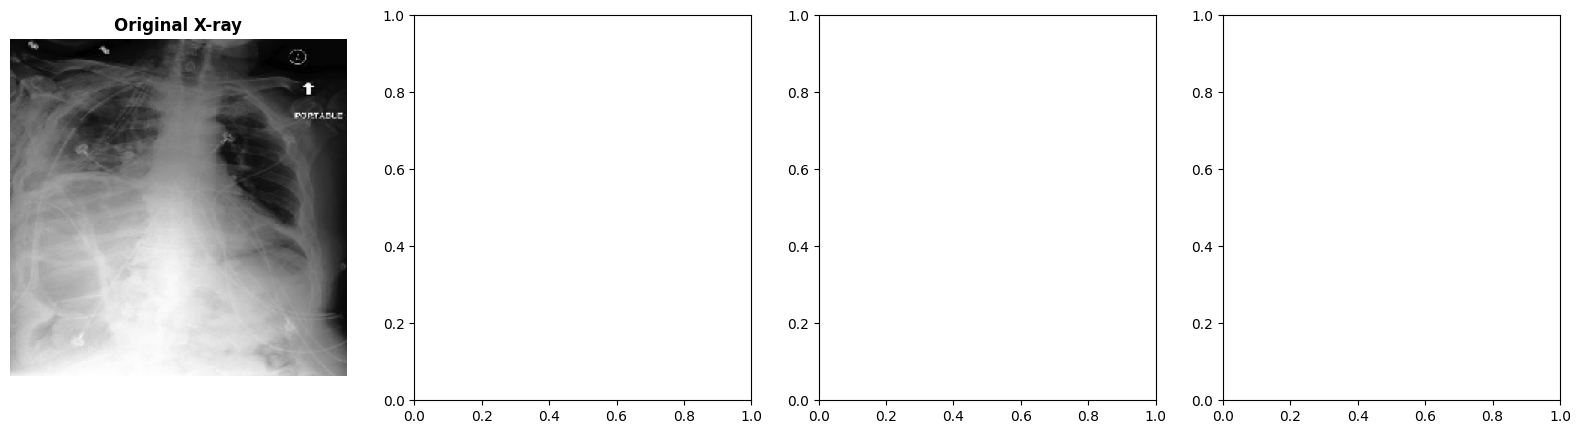

In [40]:
# Test Grad-CAM on sample images
print("🔥 Grad-CAM Visualization Examples:\n")

# Sample images from different diseases
sample_diseases_gradcam = ['Cardiomegaly', 'Pneumonia', 'Atelectasis']

for disease in sample_diseases_gradcam:
    if disease in test_df.columns and test_df[disease].sum() > 0:
        sample_row = test_df[test_df[disease] == 1].sample(1).iloc[0]
        print(f"\nSample with {disease}:")
        display_gradcam(sample_row['image_path'], model, DISEASE_COLUMNS)
    else:
        print(f"No samples found for {disease}")

In [ ]:
# Save final model
model.save('heart_disease_detection_final.h5')
print("✅ Model saved as 'heart_disease_detection_final.h5'")

# Save to Google Drive
!cp heart_disease_detection_final.h5 /content/drive/MyDrive/
print("✅ Model copied to Google Drive")

# Save results
import json

results_summary = {
    'test_loss': float(test_results[0]),
    'test_accuracy': float(test_results[1]),
    'test_precision': float(test_results[2]),
    'test_recall': float(test_results[3]),
    'test_auc': float(test_results[4]),
    'per_disease_results': results_df.to_dict('records')
}

with open('test_results.json', 'w') as f:
    json.dump(results_summary, f, indent=4)

!cp test_results.json /content/drive/MyDrive/
print("✅ Results saved as 'test_results.json' and copied to Google Drive")

# Save per-disease results CSV
results_df.to_csv('per_disease_results.csv', index=False)
!cp per_disease_results.csv /content/drive/MyDrive/
print("✅ Per-disease results saved")